# Xử lý ngôn ngữ tự nhiên - Natural Language Processing

Các đánh giá của thực khách đến nhà hàng là một phần quan trọng để phát triển nhà hàng. Dựa trên đánh giá này nhà hàng có thể đưa ra các cải tiến phù hợp cho sau này. Tuy nhiên, có nhiều loại đánh giá khác nhau, chúng ta cần phân loại chúng để xử lý.

Dữ liệu được cung cấp bao gồm các các nhận xét của thực khách về nhà hàng và được phân làm hai loại thích và không thích.


**Yêu cầu:**
1. Tạo tập dữ liệu từ dữ liệu thô (**Restaurant_Reviews.csv**):
    - Làm sạch dữ liệu (có thể dùng thư viện nltk để hỗ trợ), dùng wordcloud để visualize dữ liệu, chia dữ liệu ra làm 2 phần huấn luyện, kiểm ra với tỉ lệ 8:2
    - Dùng mô hình Bags of Words để huyển dữ liệu về dạng vector
    - Chia tập dữ liệu thành 2 phần để huấn luyện và kiểm tra mô hình
3. Dùng mô hình Naive Bayes để phân loại các đánh giá


In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
%cd "/content/drive/MyDrive/CS116 "

/content/drive/MyDrive/CS116 


## Cài đặt một số thư viện phổ biến

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Cài đặt dữ liệu

In [136]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [137]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
8,The fries were great too.,1
9,A great touch.,1


## Làm sạch dữ liệu

In [138]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk, re
nltk.download('stopwords')
n_sample = len(dataset)
corpus = []
for i in range(n_sample):
  review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word)for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [140]:
len(corpus)

1000

In [141]:
from wordcloud import WordCloud
# stopwords = set(stopwords)
def create_wordcloud(list_sample):
  # a list contains texts
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                # stopwords = stopwords,
                min_font_size = 10).generate(str(list_sample))
 
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

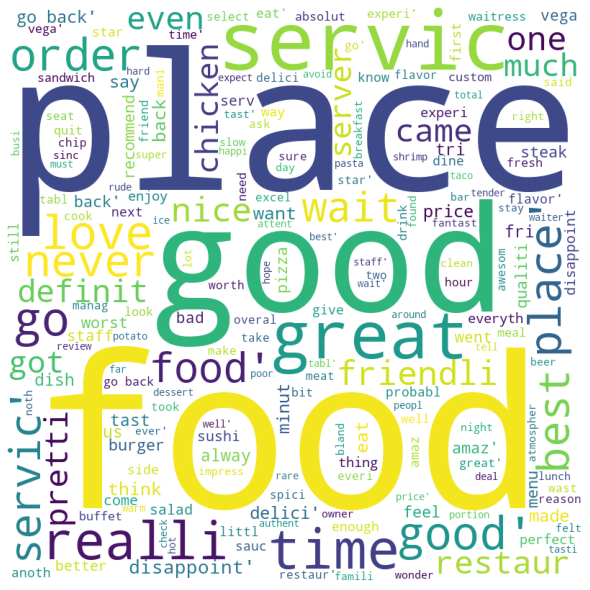

In [142]:
create_wordcloud(corpus)

## Tạo mô hình Bag of Words

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1]

In [144]:
print(X.shape)
print(y.shape)

(1000, 1500)
(1000,)


## Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra 

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Huấn luyện Naive Bayes model trên dữ liệu

In [146]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

## Dự đoán kết quả trên dữ liệu kiểm tra

In [147]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1])

## Đánh giá kết quả dự đoán bằng Confusion Matrix

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
from pprint import pprint as pp

In [151]:
from sklearn.metrics import classification_report

pp(classification_report(y_test, y_test_pred, labels=[0, 1]))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.83      0.59      0.69       110\n'
 '           1       0.63      0.86      0.73        90\n'
 '\n'
 '    accuracy                           0.71       200\n'
 '   macro avg       0.73      0.72      0.71       200\n'
 'weighted avg       0.74      0.71      0.71       200\n')


Accuracy: 71%

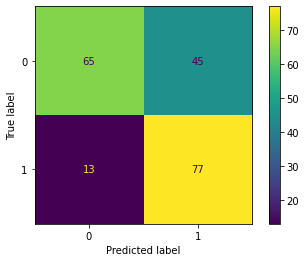

In [152]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()